Наш датасет содержит разнообразную информацию о заказах в интернет-магазине за период с декабря 2010 по октябрь 2011.  
Задача звучит так: посчитать для каждого уникального покупателя ВЕРОЯТНОСТЬ того что он купит товар в ноябре 2011.  
Ознакомиться с датасетом можно по этой ссылке: https://yadi.sk/d/VWDZcOaHpfQ5GA

Импортируем pandas, numpy, re, seaborn и matplotlib для анализа.

In [1]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('Импорт завершён.')

Импорт завершён.


Посмотрим на датасет

In [2]:
dataset = pd.read_csv('C:/Users/e.zotkin/ds/shop_project/train_data.csv')
dataset

,InvoiceNo;ProductID;Name;Quantity;InvoiceDate;PricePerItem;CustomerID;Country
0,536365;85123A;WHITE HANGING HEART T-LIGHT HOLD...
1,536365;71053;WHITE METAL LANTERN;6;01.12.10 8:...
2,536365;84406B;CREAM CUPID HEARTS COAT HANGER;8...
3,536365;84029G;KNITTED UNION FLAG HOT WATER BOT...
4,536365;84029E;RED WOOLLY HOTTIE WHITE HEART.;6...
...,...
431668,573695;23407;SET OF 2 TRAYS HOME SWEET HOME;2;...
431669,573695;23543;WALL ART KEEP CALM ;1;31.10.11 17...
431670,573695;23397;FOOT STOOL HOME SWEET HOME ;4;31....
431671,573726;72817;check;-67;31.10.11 17:18;0;;Unite...


Вид нечитабельный, установим **;** в качестве разделителя

In [3]:
dataset = pd.read_csv('C:/Users/e.zotkin/ds/shop_project/train_data.csv', sep=';')
dataset

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01.12.10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
431668,573695,23407,SET OF 2 TRAYS HOME SWEET HOME,2,31.10.11 17:13,9.95,15023.0,United Kingdom
431669,573695,23543,WALL ART KEEP CALM,1,31.10.11 17:13,8.25,15023.0,United Kingdom
431670,573695,23397,FOOT STOOL HOME SWEET HOME,4,31.10.11 17:13,9.95,15023.0,United Kingdom
431671,573726,72817,check,-67,31.10.11 17:18,0.00,NaN,United Kingdom


Проверим таблицу на наличие дубликатов

In [4]:
dataset[dataset.duplicated(['InvoiceNo', 'ProductID', 'Name', 'Quantity', 'InvoiceDate', 'PricePerItem',
                            'CustomerID', 'ProductID', 'Country'])]

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01.12.10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01.12.10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01.12.10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01.12.10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01.12.10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
428637,573492,21591,COSY HOUR CIGAR BOX MATCHES,1,31.10.11 11:57,1.25,13544.0,United Kingdom
428858,573501,82486,3 DRAWER ANTIQUE WHITE WOOD CABINET,2,31.10.11 12:02,8.95,18055.0,United Kingdom
428866,573501,23245,SET OF 3 REGENCY CAKE TINS,1,31.10.11 12:02,4.95,18055.0,United Kingdom
429099,573543,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,31.10.11 13:05,2.95,17777.0,United Kingdom


**Важно!**  
На этом этапе мы предполагаем что InvoiceNo может быть один и только один при прочих равных каждой строки.
При решении боевой задачи мы бы уточняли техническую возможность наличия в наборе полностью идентичных строк.
Однако в рамках решения этой мы будем оттлакиваться от озвученного предположения.  
  
3621 дубликат. Удаляем, пересчитываем индексы с помощью аргумента.

In [5]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01.12.10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01.12.10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
428047,573695,23407,SET OF 2 TRAYS HOME SWEET HOME,2,31.10.11 17:13,9.95,15023.0,United Kingdom
428048,573695,23543,WALL ART KEEP CALM,1,31.10.11 17:13,8.25,15023.0,United Kingdom
428049,573695,23397,FOOT STOOL HOME SWEET HOME,4,31.10.11 17:13,9.95,15023.0,United Kingdom
428050,573726,72817,check,-67,31.10.11 17:18,0.00,NaN,United Kingdom


Проверяем есть ли NaN вообще где-либо в наборе.

In [6]:
dataset.isnull().values.any()

True

Копаем глубже. NaN есть только в Name и в CustomerID.

In [7]:
dataset.isnull().any()

InvoiceNo       False
ProductID       False
Name             True
Quantity        False
InvoiceDate     False
PricePerItem    False
CustomerID       True
Country         False
dtype: bool

Посмотрим сколько их вообще там:

In [8]:
dataset.isnull().sum()

InvoiceNo            0
ProductID            0
Name              1364
Quantity             0
InvoiceDate          0
PricePerItem         0
CustomerID      108062
Country              0
dtype: int64

Проверим сможем ли мы обойтись без Name.  
Для этого убедимся что каждому значению столбца Name (кроме NaN) соответствует только одно значение значение ProductID:

In [9]:
dataset[['Name', 'ProductID']].groupby(['Name']).nunique().sort_values(['ProductID'], ascending=False).head(30)

,Name,ProductID
Name,,
?,1,47
check,1,38
damaged,1,35
damages,1,33
sold as set on dotcom,1,20
found,1,16
Damaged,1,14
adjustment,1,12
Unsaleable. destroyed.,1,9


Как видим выше, в наборе среди имён есть много "мусорных" значений (adjustment, ?, mailout и др.)
Попробуем частично от них избавиться:

In [10]:
for i in ['?', 'check', 'damaged', 'damages', 'sold as set on dotcom', 'found',
          'Damaged', 'adjustment', 'Unsaleable. destroyed.', 'thrown away', 'Found',
           '??', 'wet damaged', 'ebay', 'damages?', 'Amazon', 'mailout', 'amazon', '?missing', 'Manual']:
    dataset.Name.loc[dataset.Name == i] = np.nan
    print('Значения ' + i + ' заменены на NaN.')

print('Замена завершена.')

C:\Users\e.zotkin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\e.zotkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Значения ? заменены на NaN.
Значения check заменены на NaN.
Значения damaged заменены на NaN.
Значения damages заменены на NaN.
Значения sold as set on dotcom заменены на NaN.
Значения found заменены на NaN.
Значения Damaged заменены на NaN.
Значения adjustment заменены на NaN.
Значения Unsaleable. destroyed. заменены на NaN.
Значения thrown away заменены на NaN.
Значения Found заменены на NaN.
Значения ?? заменены на NaN.
Значения wet damaged заменены на NaN.
Значения ebay заменены на NaN.
Значения damages? заменены на NaN.
Значения Amazon заменены на NaN.
Значения mailout заменены на NaN.
Значения amazon заменены на NaN.
Значения ?missing заменены на NaN.
Значения Manual заменены на NaN.
Замена завершена.


Повторяем проверку:

In [11]:
dataset[['Name', 'ProductID']].groupby(['Name']).nunique().sort_values(['ProductID'], ascending=False).head(30)

,Name,ProductID
Name,,
METAL SIGN.CUPCAKE SINGLE HOOK,1,6
TEA TIME TABLE CLOTH,1,2
SET OF 4 ENGLISH ROSE COASTERS,1,2
SET/6 TURQUOISE BUTTERFLY T-LIGHTS,1,2
75 GREEN FAIRY CAKE CASES,1,2
75 GREEN PETIT FOUR CASES,1,2
WHITE SQUARE TABLE CLOCK,1,2
STORAGE TIN VINTAGE LEAF,1,2
WHITE STITCHED WALL CLOCK,1,2


Проверим откуда дублируются значения:

In [12]:
print(dataset[['Name', 'ProductID']][dataset.Name == '75 GREEN FAIRY CAKE CASES'].groupby('ProductID').count())
print(dataset[['Name', 'ProductID']][dataset.Name == 'METAL SIGN.CUPCAKE SINGLE HOOK'].groupby('ProductID').count())
print(dataset[['Name', 'ProductID']][dataset.Name == 'S/4 PINK FLOWER CANDLES IN BOWL'].groupby('ProductID').count())

           Name
ProductID      
84989A       12
84989a       25
           Name
ProductID      
82613A       18
82613B      105
82613C       92
82613a        1
82613b        4
82613c        4
           Name
ProductID      
85040A      150
85040a       16


**Важно!**  
Как мы видим, значения ProductID не приведены к единому виду.  
Здесь мы делаем эмпирическое заключение о том что это ошибка и далее будем приводить ProductID к единому виду.  
В боевой задаче мы бы уточняли есть ли разница в буквенном обозначении заказа или его регистре.

Удалим все буквы из столбца ProductID:

In [13]:
dataset['ProductID'] = dataset['ProductID'].str.extract('(\d+)', expand = False)

print('Удаление букв в ProductID завершено.')

Удаление букв в ProductID завершено.


C:\Users\e.zotkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Проверим появились ли ещё дубликаты:

In [14]:
dataset[dataset.duplicated(['InvoiceNo', 'ProductID', 'Name', 'Quantity', 'InvoiceDate', 'PricePerItem',
                            'CustomerID', 'ProductID', 'Country'])]

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
1715,536544,82613,METAL SIGN.CUPCAKE SINGLE HOOK,1,01.12.10 14:32,2.51,NaN,United Kingdom
2889,536592,82613,METAL SIGN.CUPCAKE SINGLE HOOK,1,01.12.10 17:06,2.51,NaN,United Kingdom
11090,537240,82613,METAL SIGN.CUPCAKE SINGLE HOOK,1,06.12.10 10:08,2.51,NaN,United Kingdom
18135,537823,82613,METAL SIGN.CUPCAKE SINGLE HOOK,1,08.12.10 14:25,2.51,NaN,United Kingdom
20893,538071,82613,METAL SIGN.CUPCAKE SINGLE HOOK,1,09.12.10 14:09,2.51,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
366994,569105,82613,METAL SIGN.CUPCAKE SINGLE HOOK,3,30.09.11 12:35,1.25,16729.0,United Kingdom
382378,570197,82613,METAL SIGN.CUPCAKE SINGLE HOOK,1,07.10.11 15:45,1.25,13755.0,United Kingdom
389026,570688,82613,METAL SIGN.CUPCAKE SINGLE HOOK,1,11.10.11 16:29,2.46,NaN,United Kingdom
410496,572330,82613,METAL SIGN.CUPCAKE SINGLE HOOK,1,24.10.11 10:17,1.25,16426.0,United Kingdom


66 дубликатов. Удаляем, пересчитываем индексы с помощью аргумента.

In [15]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset

,InvoiceNo,ProductID,Name,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01.12.10 8:26,3.39,17850.0,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,01.12.10 8:26,2.75,17850.0,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.10 8:26,3.39,17850.0,United Kingdom
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
427981,573695,23407,SET OF 2 TRAYS HOME SWEET HOME,2,31.10.11 17:13,9.95,15023.0,United Kingdom
427982,573695,23543,WALL ART KEEP CALM,1,31.10.11 17:13,8.25,15023.0,United Kingdom
427983,573695,23397,FOOT STOOL HOME SWEET HOME,4,31.10.11 17:13,9.95,15023.0,United Kingdom
427984,573726,72817,NaN,-67,31.10.11 17:18,0.00,NaN,United Kingdom


Повторяем проверку:

In [16]:
dataset[['Name', 'ProductID']].groupby(['Name']).nunique().sort_values(['ProductID'], ascending=False).head(50)

,Name,ProductID
Name,,
SQUARE CHERRY BLOSSOM CABINET,1,2
sold as 1,1,2
PINK FLOCK GLASS CANDLEHOLDER,1,2
stock check,1,2
COLUMBIAN CANDLE RECTANGLE,1,2
COLUMBIAN CANDLE ROUND,1,2
ROUND BLUE CLOCK WITH SUCKER,1,2
incorrect stock entry.,1,2
PINK FAIRY CAKE CUSHION COVER,1,2


Ещё раз проверим откуда дублируются значения:

In [17]:
print(dataset[['Name', 'ProductID']][dataset.Name == 'SQUARE CHERRY BLOSSOM CABINET'].groupby('ProductID').count())
print(dataset[['Name', 'ProductID']][dataset.Name == 'EAU DE NILE JEWELLED PHOTOFRAME'].groupby('ProductID').count())
print(dataset[['Name', 'ProductID']][dataset.Name == 'PAPER LANTERN 9 POINT SNOW STAR'].groupby('ProductID').count())

           Name
ProductID      
84665        16
84666         4
           Name
ProductID      
85023        12
85024        10
           Name
ProductID      
23040         4
23041        28


**Важно!**  
Теперь мы видим что гипотеза о том что каждому значению столбца ProductID соответствует только одно значение столбца
Name **не подтвердилась**. Поэтому с чистой совестью полностью избавиться от него мы, к сожалению, не можем.
Однако, учитывая из п.16 тот факт что только 18 наименований товаров имеют по 2 значения ProductID и их
сумма всего 74 что из общего количества является допустимой погрешностью (эмпирически) мы полностью удалим 
столбец Name подразумевая что этим избавимся от всех его NaN и мусорных значений, а также будем уверены
в том что ProductID сполна перекрывает всю его сущность.

In [18]:
del dataset['Name']
dataset

,InvoiceNo,ProductID,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
0,536365,85123,6,01.12.10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,01.12.10 8:26,3.39,17850.0,United Kingdom
2,536365,84406,8,01.12.10 8:26,2.75,17850.0,United Kingdom
3,536365,84029,6,01.12.10 8:26,3.39,17850.0,United Kingdom
4,536365,84029,6,01.12.10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
427981,573695,23407,2,31.10.11 17:13,9.95,15023.0,United Kingdom
427982,573695,23543,1,31.10.11 17:13,8.25,15023.0,United Kingdom
427983,573695,23397,4,31.10.11 17:13,9.95,15023.0,United Kingdom
427984,573726,72817,-67,31.10.11 17:18,0.00,NaN,United Kingdom


In [19]:
# Теперь приступим к анализу каждого столбца. Начнём с InvoiceNo:

error_space = []

for i in dataset['InvoiceNo']:
    try:
        i = int(i)
    except ValueError:
        if i not in error_space:
            error_space.append(i)

print(error_space[:20])
print('\n',len(error_space))

['C536379', 'C536383', 'C536391', 'C536506', 'C536543', 'C536548', 'C536606', 'C536622', 'C536625', 'C536642', 'C536734', 'C536737', 'C536757', 'C536758', 'C536760', 'C536807', 'C536812', 'C536814', 'C536815', 'C536816']

 3252


Мы получили 3252 значения требующих приведения к единому виду и типу. Удалим буквы из этих значений.

In [20]:
dataset['InvoiceNo'] = dataset['InvoiceNo'].str.extract('(\d+)', expand = False)

print('Удаление букв в InvoiceNo завершено.')

Удаление букв в InvoiceNo завершено.


C:\Users\e.zotkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
# Проверяем все ли значения теперь могут преобразоваться:

error_space = []

for i in dataset['InvoiceNo']:
    try:
        i = int(i)
    except ValueError:
        if i not in error_space:
            error_space.append(i)

print(error_space[:20])
print('\n',len(error_space))

[]

 0


Ошибок не произошло, значит все значения столбца могут преобразоваться к Int. Сделаем это:

In [22]:
dataset.InvoiceNo = pd.to_numeric(dataset.InvoiceNo, errors='raise')
dataset.dtypes

C:\Users\e.zotkin\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


InvoiceNo         int64
ProductID        object
Quantity          int64
InvoiceDate      object
PricePerItem    float64
CustomerID      float64
Country          object
dtype: object

Теперь проверим все ли значения InvoiceNo являются 6-значными:

In [23]:
not_6_len_space = []

for i in dataset['InvoiceNo']:
    if len(str(i)) != 6:
        not_6_len_space.append(i)

print(not_6_len_space[:20])
print('\n',len(not_6_len_space))

[]

 0


In [24]:
dataset['InvoiceNo'].isna().any()

False

Проверим InvoiceNo на аномальные выбросы:

In [25]:
dataset.InvoiceNo.describe()

count    427986.000000
mean     555397.676569
std       11087.147863
min      536365.000000
25%      545475.000000
50%      555739.000000
75%      565317.000000
max      573734.000000
Name: InvoiceNo, dtype: float64

Значения укладываются в диапазон от 536365 до 573734. Проверка InvoiceNo завершена, он состоит из 6-значных чисел с типом int. Переходим к ProductID:

Сколько уникальных значений которые не могут быть преобразованы в Int

In [26]:
error_space = []

for i in dataset['ProductID']:
    try:
        i = int(i)
    except ValueError:
        if i not in error_space:
            error_space.append(i)

print(error_space[:20])
print('\n',len(error_space))

[nan]

 1


Сколько NaN:

In [27]:
dataset['ProductID'].isna().sum()

2382

Привести NaN к Int не получится. Поэтому сначала заменим NaN на 0. Выполним преобразование:

In [28]:
dataset.ProductID.fillna(int(0), inplace=True)

C:\Users\e.zotkin\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Проверим что теперь все значения приводимы к Int:

In [29]:
error_space = []

for i in dataset['ProductID']:
    try:
        i = int(i)
    except ValueError:
        if i not in error_space:
            error_space.append(i)

print(error_space[:20])
print('\n',len(error_space))

[]

 0


Выполним преобразование:

In [30]:
dataset.ProductID = dataset.ProductID.astype(int)
dataset.dtypes

InvoiceNo         int64
ProductID         int32
Quantity          int64
InvoiceDate      object
PricePerItem    float64
CustomerID      float64
Country          object
dtype: object

Проверим что все значения ProductID являются 5-значными:

In [31]:
not_5_len_space = []

for i in dataset['ProductID']:
    if len(str(i)) != 5:
        not_5_len_space.append(i)

print(not_5_len_space[:30])
print('\n',len(not_5_len_space))

[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

 2552


Выведем все уникальные не 5-значных значений

In [32]:
print(set(not_5_len_space))

{0, 1, 2, 3, 4, 69, 70, 71, 72, 73, 74, 68, 76, 66, 67, 55, 57}


2552 некорректных идентификатора продукта. Заменим их на 0:

In [33]:
dataset.ProductID.loc[dataset.ProductID < 100] = 0

C:\Users\e.zotkin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\e.zotkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Повторим проверку:

In [34]:
not_5_len_space = []

for i in dataset['ProductID']:
    if len(str(i)) != 5:
        not_5_len_space.append(i)

print(not_5_len_space[:30])
print('\n',len(not_5_len_space))
print(set(not_5_len_space))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

 2552
{0}


Теперь все не 5-значные значения приведены к 0. Приведём столбец полностью к Int:

In [35]:
dataset.ProductID = dataset.ProductID.astype(int)
dataset.dtypes

InvoiceNo         int64
ProductID         int32
Quantity          int64
InvoiceDate      object
PricePerItem    float64
CustomerID      float64
Country          object
dtype: object

Проверим аномальные выбросы (все значения кроме 0):

In [36]:
dataset.ProductID.loc[dataset.ProductID > 0].describe()

count    425434.000000
mean      31998.670318
std       21979.318333
min       10002.000000
25%       21931.000000
50%       22619.000000
75%       23239.000000
max       90214.000000
Name: ProductID, dtype: float64

Значения укладываются в диапазон от 10002 до 90214. Перейдём к Quantity. Проверим на наличие NaN:

In [37]:
dataset.Quantity.isnull().sum()

0

Проверим наличие нулей:

In [38]:
dataset.Quantity[dataset.Quantity == 0].sum()

0

Присвоим тип Int чтобы уменьшить память с 64 до 32:

In [39]:
dataset.Quantity = dataset.Quantity.astype(int)
dataset.dtypes

InvoiceNo         int64
ProductID         int32
Quantity          int32
InvoiceDate      object
PricePerItem    float64
CustomerID      float64
Country          object
dtype: object

Проверим аномальные выбросы:

In [40]:
dataset.Quantity.describe()

count    427986.000000
mean          9.811805
std         169.969043
min      -74215.000000
25%           1.000000
50%           3.000000
75%          12.000000
max       74215.000000
Name: Quantity, dtype: float64

Проверим сколько отрицательных или равных нулю значений Quantity:

In [41]:
dataset.Quantity.loc[dataset.Quantity <= 0].count()

8987

Посмотрим что находится в строках с отрицательными значениями Quantity исходного набора:

In [42]:
raw_dataset = pd.read_csv('C:/Users/e.zotkin/ds/shop_project/train_data.csv', sep=';')
list(raw_dataset[['Quantity', 'Name']].loc[raw_dataset.Quantity <= 0].groupby(['Quantity']))

[(-74215,
         Quantity                            Name
  61624    -74215  MEDIUM CERAMIC TOP STORAGE JAR),
 (-9600,
          Quantity                          Name
  225529     -9600  printing smudges/thrown away
  225530     -9600  printing smudges/thrown away),
 (-9360,
        Quantity                                 Name
  4287     -9360  ROTATING SILVER ANGELS T-LIGHT HLDR),
 (-9058,
          Quantity                          Name
  225528     -9058  Printing smudges/thrown away),
 (-5368,
          Quantity        Name
  115818     -5368  throw away),
 (-4830,
          Quantity                    Name
  431381     -4830  Unsaleable. destroyed.),
 (-3667,
          Quantity Name
  341601     -3667  NaN),
 (-3167,
          Quantity Name
  323458     -3167  NaN),
 (-3114,
          Quantity                                Name
  160145     -3114  FAIRY CAKE FLANNEL ASSORTED COLOUR),
 (-3100,
          Quantity                          Name
  263884     -3100  wrongly marked.

**Важно!**  
Проанализировав информацию в столбце Name у позиций с отрицательным Quantity мы можем сделать вывод о том что эти позиции сломанных, уничтоженных, повреждённых, непроданных и т.д. товаров.  
Есть и корректные значения Name и в боевой задаче мы бы уточняли что они означают, являются ли ошибочными.  
В рамках решения тестового задания мы будем предпологать что это возвраты.  
И поскольку задача звучит так: "Для каждого клиента, который делал заказ в период с 01.12.10 по 31.10.11, необходимо спрогнозировать вероятность совершения заказа в период с 01.11.11 по 30.11.11." - мы не станем учитывать их и удалим из набора.

In [43]:
dataset = dataset.loc[dataset['Quantity'] > 0]
print('Количество позиций с Quantity <= 0: ' + str(dataset.Quantity.loc[dataset.Quantity <= 0].count()))

Количество позиций с Quantity <= 0: 0


Проверим аномальные выбросы с помощью графиков:

C:\Users\e.zotkin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


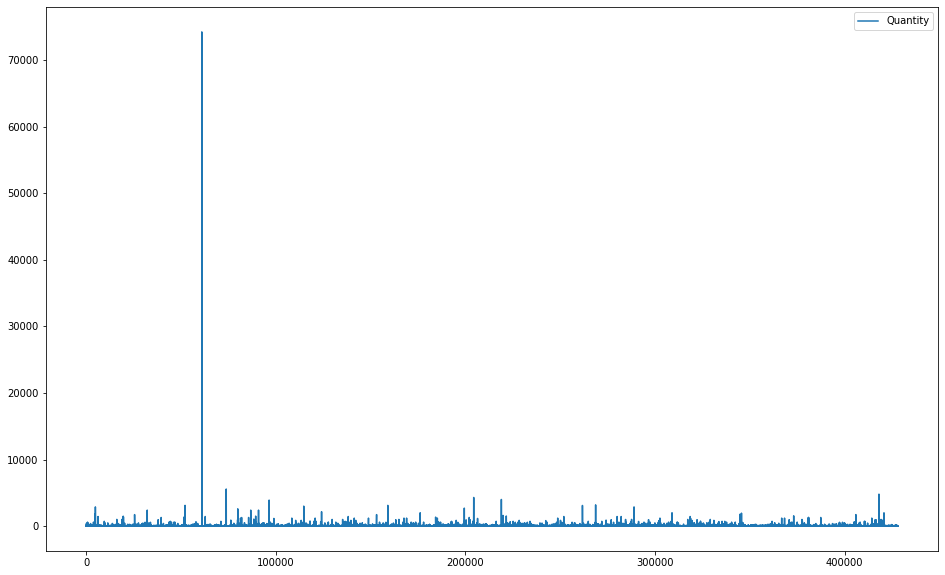

In [44]:
plt.figure(figsize=(16, 10))
dataset.Quantity.plot(style='-', label='Quantity')
plt.legend()
plt.show()

Видим аномальный выброс. Удалим все позиции с Quantity > 10000:

In [45]:
dataset = dataset.loc[dataset['Quantity'] < 10000]
print('Количество позиций с Quantity > 10000: ' + str(dataset.Quantity.loc[dataset.Quantity > 10000].count()))

Количество позиций с Quantity > 10000: 0


Перестроим график:

C:\Users\e.zotkin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


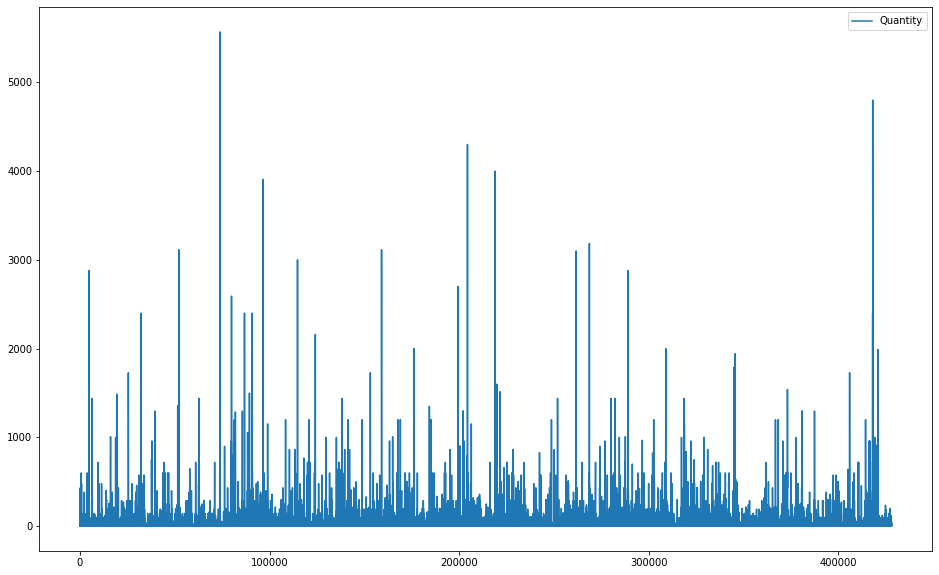

In [46]:
plt.figure(figsize=(16, 10))
dataset.Quantity.plot(style='-', label='Quantity')
plt.legend()
plt.show()

Посмотрим в уменьшенном масштабе:

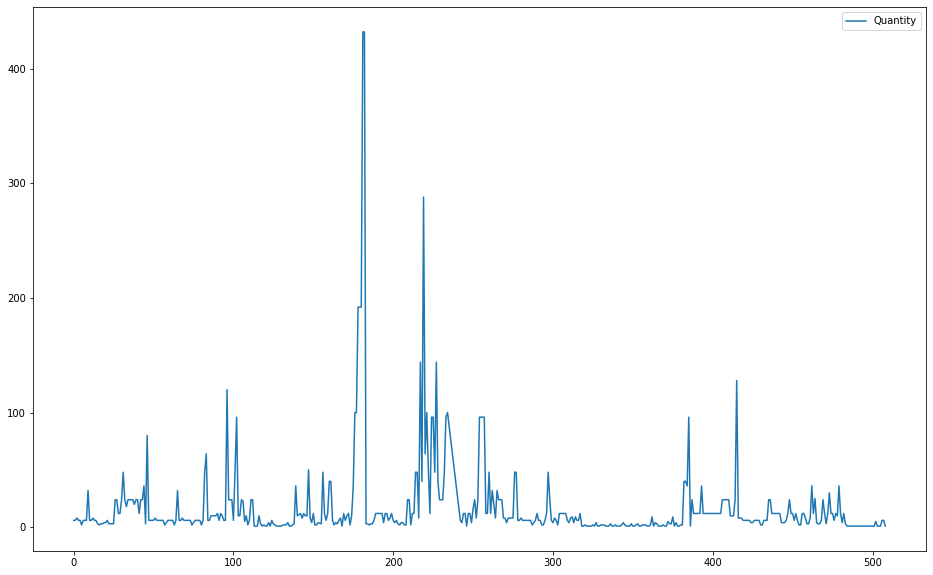

In [47]:
plt.figure(figsize=(16, 10))
dataset.Quantity[:500].plot(style='-', label='Quantity')
plt.legend()
plt.show()

Ещё раз взглянем на диапазон:

In [48]:
dataset.Quantity.describe()

count    418998.000000
mean         10.710323
std          41.808624
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max        5568.000000
Name: Quantity, dtype: float64

**Важно!**  
Отсюда мы будем считать что большие значения Quantity корректны. Например, это могут быть оптовые заказы.  

Перейдём к InvoiceDate. Проверим что во всех значениях InvoiceDate есть один и тот же шаблон:

In [49]:
dataset.InvoiceDate.str.match(r'\d{2}.\d{2}.\d{2} \d{1,2}:\d{2}').all()

True

Проверим длину каждого значения чтобы быть уверенными в том по краям нет лишних символов:

In [50]:
print('Слева об шаблона есть лишние символы: ' + str(dataset.InvoiceDate.str.match(r'.+\d{2}.\d{2}.\d{2} \d{1,2}:\d{2}').any()))
print('Справа об шаблона есть лишние символы: ' + str(dataset.InvoiceDate.str.match(r'\d{2}.\d{2}.\d{2} \d{1,2}:\d{2}.+').any()))
print('По обоим краям шаблона есть лишние символы: ' + str(dataset.InvoiceDate.str.match(r'.+\d{2}.\d{2}.\d{2} \d{1,2}:\d{2}.+').any()))

Слева об шаблона есть лишние символы: False
Справа об шаблона есть лишние символы: False
По обоим краям шаблона есть лишние символы: False


Пересчитаем индексы и приведём записи вида 01.12.10 8:26 к виду 01.12.10 08:26 чтобы передать в преобразование datetime:

In [51]:
dataset = dataset.reset_index(drop=True)

In [52]:
count = 0
for i in range(418998):
    if len(dataset.InvoiceDate[i]) == 13:
        dataset.InvoiceDate[i] = dataset.InvoiceDate[i].replace(' ', ' 0')
        count += 1

print('Обновлено ' + str(count) + ' значений.')

C:\Users\e.zotkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Обновлено 33989 значений.


Теперь приведём InvoiceDate к datetime:

In [53]:
dataset.InvoiceDate = pd.to_datetime(dataset['InvoiceDate'], format='%d.%m.%y %H:%M')
dataset.InvoiceDate

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
418993   2011-10-31 17:13:00
418994   2011-10-31 17:13:00
418995   2011-10-31 17:13:00
418996   2011-10-31 17:13:00
418997   2011-10-31 17:13:00
Name: InvoiceDate, Length: 418998, dtype: datetime64[ns]

Убедимся в отсутствии аномальных выбросов:

In [54]:
dataset.InvoiceDate.describe()

count                  418998
unique                  15705
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-10-31 17:13:00
Name: InvoiceDate, dtype: object

Переходим к PricePerItem. Проверим что нет нулей, NaN и посмотрим какой тип:

In [55]:
print('Количество нулей в PricePerItem: ' + str(dataset.PricePerItem[dataset.PricePerItem == 0].count()))
print('Есть ли NaN: ' + str(dataset.PricePerItem.isnull().any()))
print(dataset.PricePerItem.dtype)

Количество нулей в PricePerItem: 1021
Есть ли NaN: False
float64


Проверим аномальные выбросы:

In [56]:
dataset.PricePerItem.describe()

count    418998.000000
mean          3.910225
std          45.223172
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: PricePerItem, dtype: float64

Построим график:

C:\Users\e.zotkin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


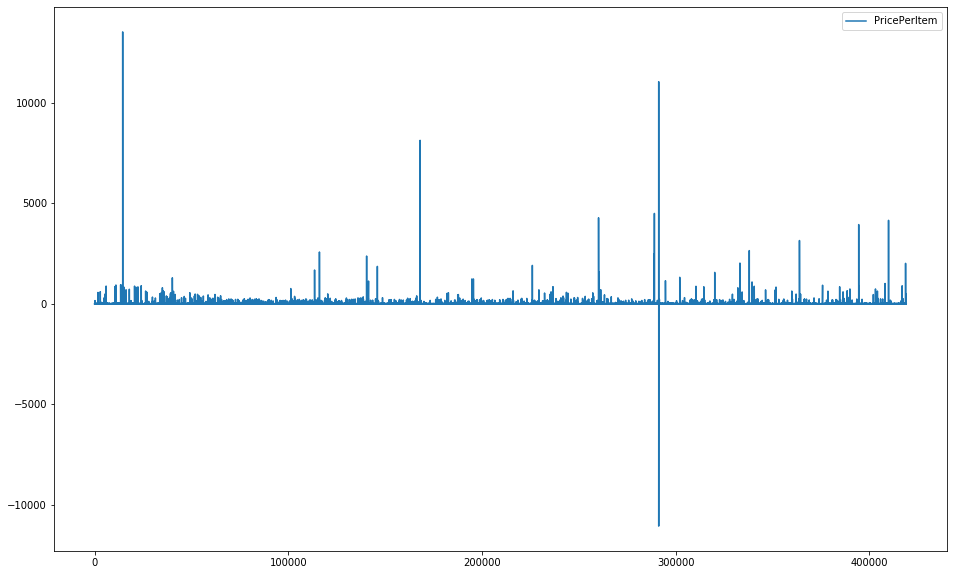

In [57]:
plt.figure(figsize=(16, 10))
dataset.PricePerItem.plot(style='-', label='PricePerItem')
plt.legend()
plt.show()

**Важно!**  
Мы видим несколько аномальных выбросов цены.  
В боевой задаче мы бы уточняли их корректность.  
В рамках решения тестовой мы будем полагать что это корректные значения.

Заменим отрицательные значения на 0:

In [58]:
dataset = dataset.loc[dataset['PricePerItem'] >= 0]
print('Количество позиций с PricePerItem < 0: ' + str(dataset.Quantity.loc[dataset.Quantity < 0].count()))

Количество позиций с PricePerItem < 0: 0


Перестроим график:

C:\Users\e.zotkin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


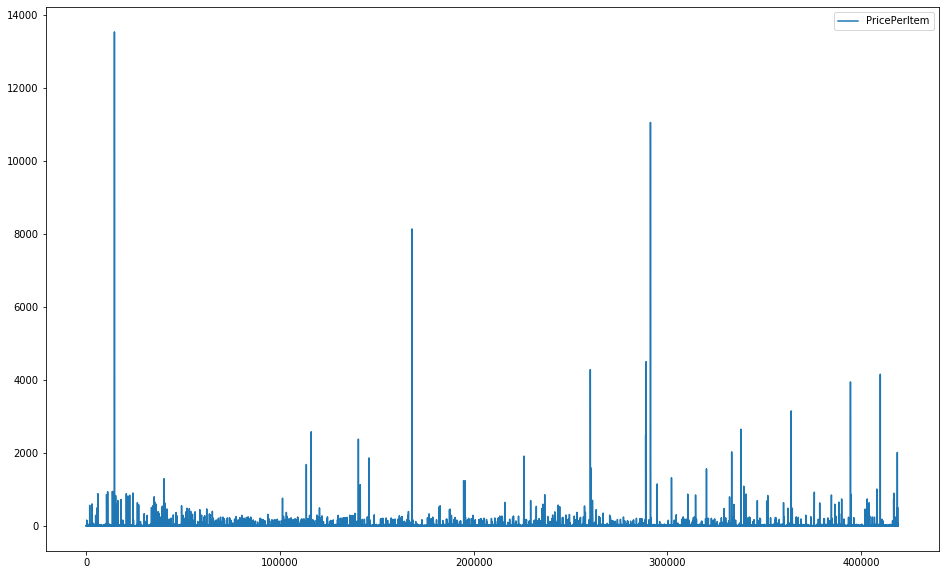

In [59]:
plt.figure(figsize=(16, 10))
dataset.PricePerItem.plot(style='-', label='PricePerItem')
plt.legend()
plt.show()

Присвоим тип float:

In [60]:
dataset.PricePerItem = dataset.PricePerItem.astype(float)
dataset.dtypes

InvoiceNo                int64
ProductID                int32
Quantity                 int32
InvoiceDate     datetime64[ns]
PricePerItem           float64
CustomerID             float64
Country                 object
dtype: object

Ещё раз пересчитаем индексы:

In [61]:
dataset = dataset.reset_index(drop=True)

Перейдём к CustomerID:

In [62]:
print('Количество нулей в CustomerID: ' + str(dataset.CustomerID[dataset.CustomerID == 0].count()))
print('Есть ли NaN: ' + str(dataset.CustomerID.isnull().any()))
print(dataset.CustomerID.dtype)

Количество нулей в CustomerID: 0
Есть ли NaN: True
float64


Посмотрим количество NaN:

In [63]:
print('Количество NaN в CustomerID: ' + str(len(dataset) - dataset.CustomerID.count()))

Количество NaN в CustomerID: 106506


Это огромное количество, почти четверть!  
Мы подумаем что с этим делать и как мы сможем применить информацию по покупкам в которых не указан CustomerID.  
Сейчас мы посмотрим на графиках диапазон значений и, поскльку CustomerID это категориальные данные, присвоим каждому значению NaN одно и то же число вне диапазона чтобы избавиться от NaN и сохранить единообразие.

C:\Users\e.zotkin\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


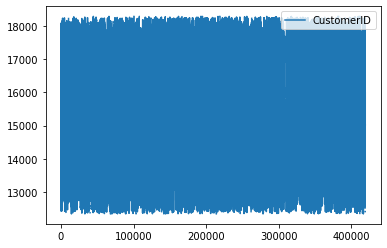

In [64]:
plt.figure()
dataset.CustomerID.plot(style='-', label='CustomerID')
plt.legend()

Видим что CustomerID находится в диапазоне ~12000-17000. Присвоим каждому NaN значение 10000:

In [65]:
dataset.CustomerID = dataset.CustomerID.fillna(0)

Присвоим тип Int:

In [66]:
dataset.CustomerID = dataset.CustomerID.astype(int)
dataset.dtypes

InvoiceNo                int64
ProductID                int32
Quantity                 int32
InvoiceDate     datetime64[ns]
PricePerItem           float64
CustomerID               int32
Country                 object
dtype: object

Переходим к последнему столбцу Country:

In [67]:
print('Количество нулей в Country: ' + str(dataset.Country[dataset.Country == 0].count()))
print('Есть ли NaN: ' + str(dataset.Country.isnull().any()))
print(dataset.Country.dtype)

Количество нулей в Country: 0
Есть ли NaN: False
object


Посмотрим на уникальные значения Country и их количество:

In [68]:
dataset.Country.groupby(dataset.Country).count()

Country
Australia                 1141
Austria                    321
Bahrain                     18
Belgium                   1694
Brazil                      32
Canada                     151
Channel Islands            669
Cyprus                     509
Czech Republic              25
Denmark                    286
EIRE                      6481
European Community          60
Finland                    598
France                    6530
Germany                   7621
Greece                     109
Hong Kong                  279
Iceland                    171
Israel                     291
Italy                      574
Japan                      289
Lebanon                     45
Lithuania                   35
Malta                      100
Netherlands               2052
Norway                     816
Poland                     259
Portugal                  1248
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2112


* Будем понимать что EIRE согласно международным стандартам это Ирландия.  
* Hong Kong это китай.  
* European Community это область, а мы ожидаем конкретную страну.  
* Мы могли бы объеденить некоторые страны в регионы или материки чтобы получить в помощь новую колонку, но в рамках этго задания и учитывая малое количество строк с этим значением мы объединим их со значением Unspecified.  
* То же действие мы выполним с RSA.

In [69]:
dataset.Country[dataset.Country == 'EIRE'] = 'Ireland'
print('В Country значения EIRE заменены на Ireland')

dataset.Country[dataset.Country == 'Hong Kong'] = 'China'
print('В Country значения Hong Kong заменены на China')

dataset.Country[dataset.Country == 'European Community'] = 'Unspecified'
print('В Country значения European Community заменены на Unspecified')

dataset.Country[dataset.Country == 'RSA'] = 'Unspecified'
print('В Country значения RSA заменены на Unspecified')

В Country значения EIRE заменены на Ireland
В Country значения Hong Kong заменены на China
В Country значения European Community заменены на Unspecified
В Country значения RSA заменены на Unspecified


C:\Users\e.zotkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\e.zotkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\e.zotkin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im

Взглянем ещё раз на уникальные значения:

In [70]:
dataset.Country.groupby(dataset.Country).count()

Country
Australia                 1141
Austria                    321
Bahrain                     18
Belgium                   1694
Brazil                      32
Canada                     151
Channel Islands            669
China                      279
Cyprus                     509
Czech Republic              25
Denmark                    286
Finland                    598
France                    6530
Germany                   7621
Greece                     109
Iceland                    171
Ireland                   6481
Israel                     291
Italy                      574
Japan                      289
Lebanon                     45
Lithuania                   35
Malta                      100
Netherlands               2052
Norway                     816
Poland                     259
Portugal                  1248
Saudi Arabia                 9
Singapore                  222
Spain                     2112
Sweden                     373
Switzerland               1734


Приведём Country к str:

In [71]:
dataset.Country = dataset.Country.astype(str)
dataset.dtypes

InvoiceNo                int64
ProductID                int32
Quantity                 int32
InvoiceDate     datetime64[ns]
PricePerItem           float64
CustomerID               int32
Country                 object
dtype: object

Теперь ещё раз проверим набора на наличие дубликатов и удалим их и пересчитаем индексы:

In [72]:
dataset[dataset.duplicated(['InvoiceNo', 'ProductID', 'Quantity', 'InvoiceDate', 'PricePerItem',
                            'CustomerID', 'ProductID', 'Country'])]

,InvoiceNo,ProductID,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
4,536365,84029,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
62,536373,84029,6,2010-12-01 09:02:00,3.39,17850,United Kingdom
79,536375,84029,6,2010-12-01 09:32:00,3.39,17850,United Kingdom
121,536381,37444,1,2010-12-01 09:41:00,2.95,15311,United Kingdom
133,536381,15056,2,2010-12-01 09:41:00,5.95,15311,United Kingdom
...,...,...,...,...,...,...,...
418598,573585,84970,6,2011-10-31 14:41:00,2.08,0,United Kingdom
418610,573585,85032,5,2011-10-31 14:41:00,1.63,0,United Kingdom
418671,573585,90182,1,2011-10-31 14:41:00,2.90,0,United Kingdom
418830,573601,85049,1,2011-10-31 15:24:00,3.29,0,United Kingdom


In [73]:
dataset = dataset.drop_duplicates(ignore_index=True)
dataset = dataset.reset_index(drop=True)
dataset

,InvoiceNo,ProductID,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
0,536365,85123,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,22752,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...
412429,573695,23557,2,2011-10-31 17:13:00,12.50,15023,United Kingdom
412430,573695,85123,32,2011-10-31 17:13:00,2.55,15023,United Kingdom
412431,573695,23407,2,2011-10-31 17:13:00,9.95,15023,United Kingdom
412432,573695,23543,1,2011-10-31 17:13:00,8.25,15023,United Kingdom


Это наш финальный набор данных. Мы удалили 4.45% строк которые сочли некорректными. Сохраним набор:

In [74]:
dataset.to_csv('prepared_train_data.csv', sep=';', index=False)

Создадим новый объект и сошлёмся на сохранённый набор. Назовём его pds (prepared data set):

In [2]:
pds = pd.read_csv('C:/Users/e.zotkin/prepared_train_data.csv', sep=';')
pds

,InvoiceNo,ProductID,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
0,536365,85123,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,22752,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...
412429,573695,23557,2,2011-10-31 17:13:00,12.50,15023,United Kingdom
412430,573695,85123,32,2011-10-31 17:13:00,2.55,15023,United Kingdom
412431,573695,23407,2,2011-10-31 17:13:00,9.95,15023,United Kingdom
412432,573695,23543,1,2011-10-31 17:13:00,8.25,15023,United Kingdom


Удалим из InvoiceDate часы и минуты - они нам не пригодятся.

In [3]:
pds.InvoiceDate = pd.to_datetime(pds['InvoiceDate'], format='%Y.%m.%d %H:%M:%S')
pds.InvoiceDate = pds['InvoiceDate'].dt.date
pds.InvoiceDate = pd.to_datetime(pds['InvoiceDate'], format='%Y.%m.%d %H:%M:%S')
pds

,InvoiceNo,ProductID,Quantity,InvoiceDate,PricePerItem,CustomerID,Country
0,536365,85123,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029,6,2010-12-01,3.39,17850,United Kingdom
4,536365,22752,2,2010-12-01,7.65,17850,United Kingdom
...,...,...,...,...,...,...,...
412429,573695,23557,2,2011-10-31,12.50,15023,United Kingdom
412430,573695,85123,32,2011-10-31,2.55,15023,United Kingdom
412431,573695,23407,2,2011-10-31,9.95,15023,United Kingdom
412432,573695,23543,1,2011-10-31,8.25,15023,United Kingdom


Для комплексной оценки добавим столбцы InvoiceMonth и ProfitExample и посчитаем несколько параметров:

InvoiceMonth - месяц в который был совершён заказ  
ProfitExample - выручка с каждой строки, произведение PricePerItem и Quantity
QuantityDay - дневное количество проданного товара  
ProfitDay - выручка за каждый день

In [4]:
pds['InvoiceMonth'] = pds['InvoiceDate'].dt.date.apply(lambda x: x.strftime('%Y-%m'))
pds.InvoiceMonth = pd.to_datetime(pds['InvoiceMonth'], format='%Y.%m')
pds['ProfitExample'] = pds.PricePerItem * pds.Quantity
pds

,InvoiceNo,ProductID,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,ProfitExample
0,536365,85123,6,2010-12-01,2.55,17850,United Kingdom,2010-12-01,15.30
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,20.34
2,536365,84406,8,2010-12-01,2.75,17850,United Kingdom,2010-12-01,22.00
3,536365,84029,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,20.34
4,536365,22752,2,2010-12-01,7.65,17850,United Kingdom,2010-12-01,15.30
...,...,...,...,...,...,...,...,...,...
412429,573695,23557,2,2011-10-31,12.50,15023,United Kingdom,2011-10-01,25.00
412430,573695,85123,32,2011-10-31,2.55,15023,United Kingdom,2011-10-01,81.60
412431,573695,23407,2,2011-10-31,9.95,15023,United Kingdom,2011-10-01,19.90
412432,573695,23543,1,2011-10-31,8.25,15023,United Kingdom,2011-10-01,8.25


Присвоим QuantityDay фрейм с количеством проданного товара за каждый день:

In [5]:
QuantityDay = pds.groupby(['InvoiceDate'])['Quantity'].sum().reset_index()
QuantityDay

,InvoiceDate,Quantity
0,2010-12-01,26602
1,2010-12-02,31048
2,2010-12-03,16256
3,2010-12-05,16061
4,2010-12-06,21651
...,...,...
266,2011-10-26,20960
267,2011-10-27,33649
268,2011-10-28,23945
269,2011-10-30,19686


Присвоим ProfitDay фрейм с денежным доходом за каждый день:

In [6]:
ProfitDay = pds.groupby(['InvoiceDate'])['ProfitExample'].sum().reset_index()
ProfitDay

,InvoiceDate,ProfitExample
0,2010-12-01,58089.61
1,2010-12-02,46919.13
2,2010-12-03,46418.94
3,2010-12-05,30881.06
4,2010-12-06,54294.96
...,...,...
266,2011-10-26,37451.49
267,2011-10-27,56977.11
268,2011-10-28,40058.41
269,2011-10-30,34071.50


Посмотрим как с течением времени менялся QuantityDay:

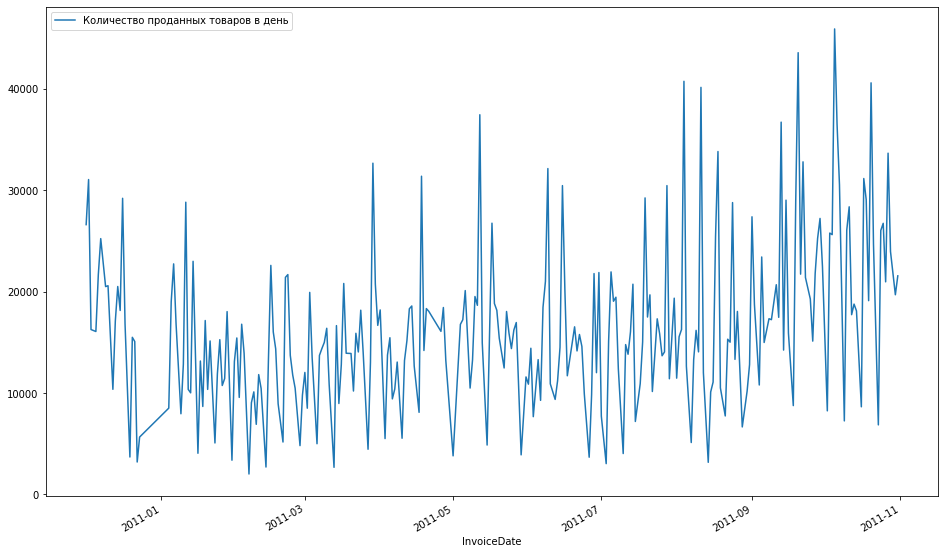

In [7]:
QuantityDay.plot(style='-', x='InvoiceDate', y='Quantity',figsize=(16, 10), label='Количество проданных товаров в день')
plt.legend()
plt.show()

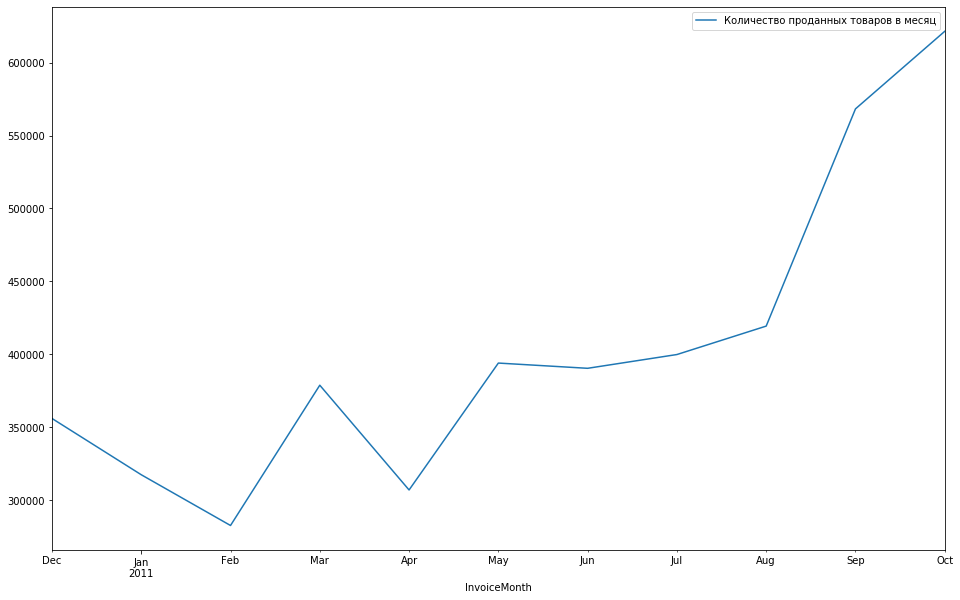

In [8]:
plt.figure(figsize=(16, 10))
pds.groupby(['InvoiceMonth'])['Quantity'].sum().plot(style='-', label='Количество проданных товаров в месяц')
plt.legend()
plt.show()

Заметим несколько моментов:  
* есть участки на которых отсутствуют продажи вообще, например конец декабря-начало января. Возможно это связано с праздниками. Это подлежит отдельному анализу.  
* в течении года есть несколько выбросов, их также следует проанализировать.  
* наблюдается общая тенденция к увеличению количества продаж.

Давайте построим такие же графики для ProfitDay:

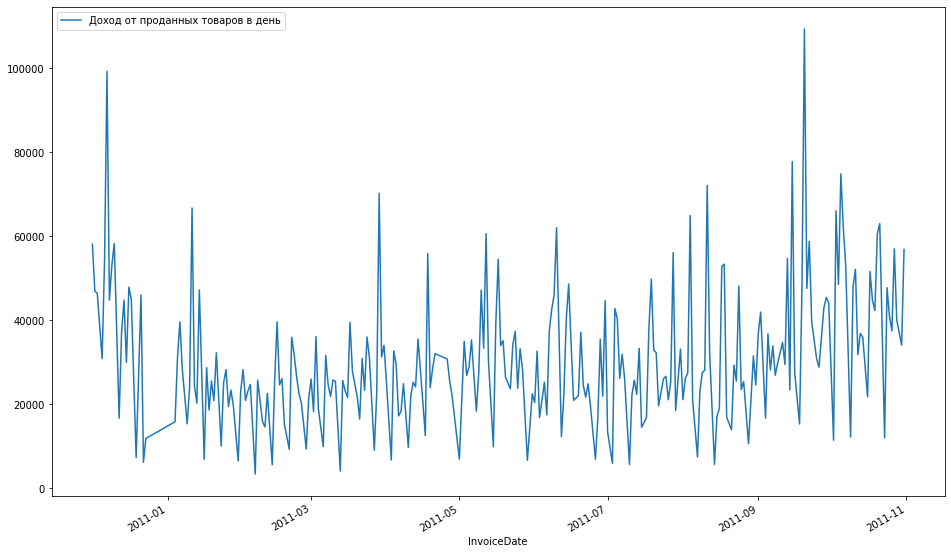

In [9]:
ProfitDay.plot(style='-', x='InvoiceDate', y='ProfitExample',figsize=(16, 10), label='Доход от проданных товаров в день')
plt.legend()
plt.show()

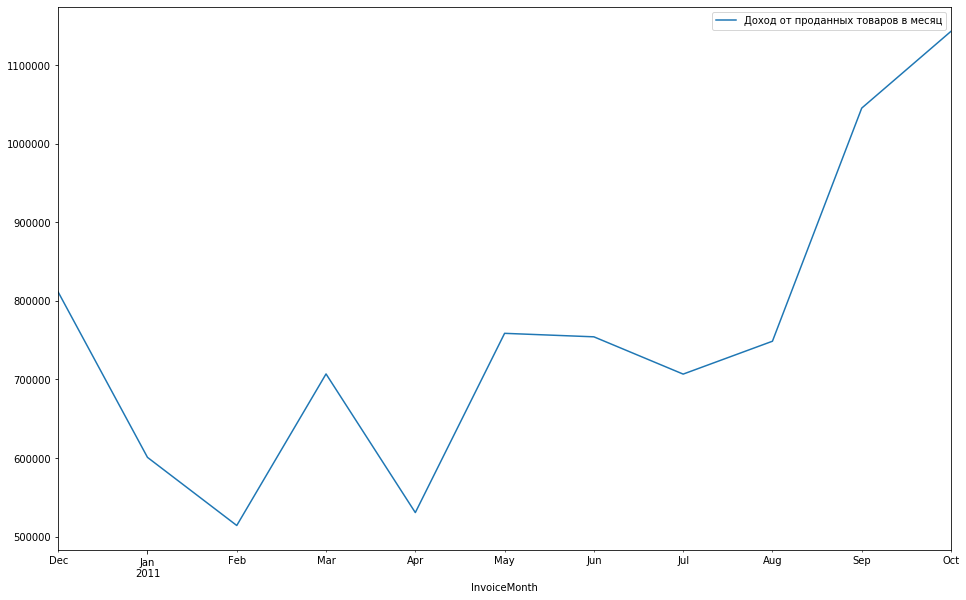

In [10]:
plt.figure(figsize=(16, 10))
pds.groupby(['InvoiceMonth'])['ProfitExample'].sum().plot(style='-', label='Доход от проданных товаров в месяц')
plt.legend()
plt.show()

**Важно!**  
В первые 4 месяца наблюдается спад доходности, рост начинается с 5-го месяца.  
Мы провели очень грубый анализ.  
В иных условиях задачи мы могли бы посчитать средние показатели количества проданных товаров и доходность от их продажи, приток новых покупателей и отток существующих, тенеденции продаж по регионам, RFM-анализ и многое другое.  
В рамках решения текущей задачи мы оставноимся на этом.

Теперь приступим к самому прогнозу.  
Будем идти от простого к сложному.  
Сначала посчитаем вероятность для каждого CustomerID.  
Помним, что четверть данных не имеют CustomerID.  
Избавимся от них, позже подумаем как можно их задействовать.  



In [11]:
pds = pds.loc[pds.CustomerID != 0].reset_index(drop=True)
pds

,InvoiceNo,ProductID,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,ProfitExample
0,536365,85123,6,2010-12-01,2.55,17850,United Kingdom,2010-12-01,15.30
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,20.34
2,536365,84406,8,2010-12-01,2.75,17850,United Kingdom,2010-12-01,22.00
3,536365,84029,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,20.34
4,536365,22752,2,2010-12-01,7.65,17850,United Kingdom,2010-12-01,15.30
...,...,...,...,...,...,...,...,...,...
307752,573695,23557,2,2011-10-31,12.50,15023,United Kingdom,2011-10-01,25.00
307753,573695,85123,32,2011-10-31,2.55,15023,United Kingdom,2011-10-01,81.60
307754,573695,23407,2,2011-10-31,9.95,15023,United Kingdom,2011-10-01,19.90
307755,573695,23543,1,2011-10-31,8.25,15023,United Kingdom,2011-10-01,8.25


**Тезис**: если в одинаковых (примерно одинаковых) условиях проведено достаточно много испытаний, то за статистическую вероятность события принимают относительную частоту данного события либо близкое число.

Классическое определение вероятности:  
P(A)=m/n, где m - число благоприятствующих событию A исходов, n - число всех элементарных равновозможных исходов в испытании.  

Так и поступим.  
**Важно!** Это очень грубая статистическая оценка вероятности. В боевых задачах её использовать нельзя.

In [12]:
stat_pds = ( pds.groupby(['CustomerID'])['InvoiceMonth'].nunique() / 11 ) 
stat_pds.sample(4)

CustomerID
16386    0.090909
18282    0.090909
13174    0.181818
16206    0.363636
Name: InvoiceMonth, dtype: float64

Наш подход будет следующим:  
* Мы разделим датасет на 2 периода -  2010-12-2011-09 включительно и  2011-10  
* Создадим новый столбец, первому присвоим метку 0, второму 1.  
* С помощью бинарной классификации будем обучать предсказывать вероятность покупки в октябре.  
* После того как настройка модели будет выполнена мы прогоним через неё весь датачет и её результатом будет вероятность совершения заказа в ноябре.  
  
Но сначала приведём таблицу к нужному виду и назначим базовые фичи.  
Создадим новый датасет, назовём его learning data set (lds) и приведём его к виду для передачи в нейронную сеть

In [13]:
pds['Target'] = 0
pds.Target.loc[pds.InvoiceDate > '2011-09-30'] = 1
pds

C:\Users\e.zotkin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,InvoiceNo,ProductID,Quantity,InvoiceDate,PricePerItem,CustomerID,Country,InvoiceMonth,ProfitExample,Target
0,536365,85123,6,2010-12-01,2.55,17850,United Kingdom,2010-12-01,15.30,0
1,536365,71053,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,20.34,0
2,536365,84406,8,2010-12-01,2.75,17850,United Kingdom,2010-12-01,22.00,0
3,536365,84029,6,2010-12-01,3.39,17850,United Kingdom,2010-12-01,20.34,0
4,536365,22752,2,2010-12-01,7.65,17850,United Kingdom,2010-12-01,15.30,0
...,...,...,...,...,...,...,...,...,...,...
307752,573695,23557,2,2011-10-31,12.50,15023,United Kingdom,2011-10-01,25.00,1
307753,573695,85123,32,2011-10-31,2.55,15023,United Kingdom,2011-10-01,81.60,1
307754,573695,23407,2,2011-10-31,9.95,15023,United Kingdom,2011-10-01,19.90,1
307755,573695,23543,1,2011-10-31,8.25,15023,United Kingdom,2011-10-01,8.25,1


Здесь мы примем **важное** решение удалить некоторые столбцы:    
* InvoiceNo - пока нет понимания как это можно применить в обучении  
* PricePerItem - его перекрывает ProfitExample  
* InvoiceMonth - его перекрывает InvoiceDate  
  
Помним: если мы хотим хранить месяцы, дни или даже более подробные данные, наш числовой формат должен удовлетворять 1 условию - он должен сохранять интервалы. Как мы видели ранее, в наборе есть пропуски дней, а значит что с InvoiceDate интервал был бы не постоянен.

In [14]:
del pds['InvoiceNo']
del pds['PricePerItem']
del pds['InvoiceMonth']
pds

,ProductID,Quantity,InvoiceDate,CustomerID,Country,ProfitExample,Target
0,85123,6,2010-12-01,17850,United Kingdom,15.30,0
1,71053,6,2010-12-01,17850,United Kingdom,20.34,0
2,84406,8,2010-12-01,17850,United Kingdom,22.00,0
3,84029,6,2010-12-01,17850,United Kingdom,20.34,0
4,22752,2,2010-12-01,17850,United Kingdom,15.30,0
...,...,...,...,...,...,...,...
307752,23557,2,2011-10-31,15023,United Kingdom,25.00,1
307753,85123,32,2011-10-31,15023,United Kingdom,81.60,1
307754,23407,2,2011-10-31,15023,United Kingdom,19.90,1
307755,23543,1,2011-10-31,15023,United Kingdom,8.25,1


Создадим массивы для нового набора:

In [15]:
CustomerID = pds['CustomerID'].unique()
CustomerID = np.sort(CustomerID)
CustomerID

array([12347, 12348, 12350, ..., 18282, 18283, 18287], dtype=int64)

In [16]:
AllQuantity = pds[['CustomerID', 'Quantity']].groupby('CustomerID')['Quantity'].sum().to_numpy()
AllQuantity

array([2218, 2341,  197, ...,   75,  776, 1514], dtype=int64)

In [17]:
AllProfit = pds[['CustomerID', 'ProfitExample']].groupby('CustomerID')['ProfitExample'].sum().to_numpy()
AllProfit

array([4009.58, 1797.24,  334.4 , ...,  100.21, 1185.69, 1717.28])

In [18]:
AllCount = pds[['CustomerID', 'ProfitExample']].groupby('CustomerID')['ProfitExample'].count().to_numpy()
AllCount

array([167,  31,  17, ...,   7, 458,  68], dtype=int64)

In [19]:
Target = pds[['CustomerID', 'Target']].groupby('CustomerID')['Target'].any().to_numpy()
Target


array([ True, False, False, ..., False,  True,  True])

Займёмся преобразованием категориальных данных: проверим какие уникальные CustomerID имеют несколько Country

In [20]:
pds[['CustomerID', 'Country']].groupby('CustomerID')['Country'].nunique().sort_values().tail(10)

CustomerID
14287    1
14290    1
12422    2
12457    2
12455    2
12429    2
12431    2
12417    2
12394    2
12370    2
Name: Country, dtype: int64

Отобразим:

In [21]:
print(pds.Country[pds.CustomerID == 12422].unique())
print(pds.Country[pds.CustomerID == 12457].unique())
print(pds.Country[pds.CustomerID == 12455].unique())
print(pds.Country[pds.CustomerID == 12429].unique())
print(pds.Country[pds.CustomerID == 12431].unique())
print(pds.Country[pds.CustomerID == 12417].unique())
print(pds.Country[pds.CustomerID == 12394].unique())
print(pds.Country[pds.CustomerID == 12370].unique())

['Australia' 'Switzerland']
['Switzerland' 'Cyprus']
['Cyprus' 'Spain']
['Denmark' 'Austria']
['Australia' 'Belgium']
['Belgium' 'Spain']
['Belgium' 'Denmark']
['Cyprus' 'Austria']


Присвоим каждому такому CustomerID новое "объединяющее" значение Country:

In [22]:
pds.Country.loc[pds.CustomerID == 12422] = 'Australia and Switzerland'
pds.Country.loc[pds.CustomerID == 12457] = 'Switzerland and Cyprus'
pds.Country.loc[pds.CustomerID == 12455] = 'Cyprus and Spain'
pds.Country.loc[pds.CustomerID == 12429] = 'Denmark and Austria'
pds.Country.loc[pds.CustomerID == 12431] = 'Australia and Belgium'
pds.Country.loc[pds.CustomerID == 12417] = 'Belgium and Spain'
pds.Country.loc[pds.CustomerID == 12394] = 'Belgium and Denmark'
pds.Country.loc[pds.CustomerID == 12370] = 'Cyprus and Austria'

C:\Users\e.zotkin\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Присвоим новые значения тем CustomerID что имели несколько стран:

In [23]:
Country = pds[['CustomerID', 'Country']].groupby('CustomerID')['Country'].unique()
for i in CustomerID:
    Country[i] = Country[i][0]
Country

CustomerID
12347           Iceland
12348           Finland
12350            Norway
12352            Norway
12353           Bahrain
              ...      
18280    United Kingdom
18281    United Kingdom
18282    United Kingdom
18283    United Kingdom
18287    United Kingdom
Name: Country, Length: 3973, dtype: object

In [24]:
lds = pd.DataFrame({'CustomerID': CustomerID, 'AllQuantity': AllQuantity, 'AllProfit': AllProfit, 'AllCount': AllCount, 'Country': Country, 'Target': Target})
del lds['CustomerID']
lds.Target = lds.Target.astype(int)
lds

,AllQuantity,AllProfit,AllCount,Country,Target
CustomerID,,,,,
12347,2218,4009.58,167,Iceland,1
12348,2341,1797.24,31,Finland,0
12350,197,334.40,17,Norway,0
12352,409,2194.31,70,Norway,0
12353,20,89.00,4,Bahrain,0
...,...,...,...,...,...
18280,45,180.60,10,United Kingdom,0
18281,54,80.82,7,United Kingdom,0
18282,75,100.21,7,United Kingdom,0


Закодируем Country с помощью ручного OneHotEncoder:

In [25]:
def code_myohe(data, feature):
    for i in data[feature].unique():
        data[feature + ': ' + i] = (data[feature] == i).astype(float)

In [26]:
code_myohe(lds, 'Country')
lds

,AllQuantity,AllProfit,AllCount,Country,Target,Country: Iceland,Country: Finland,Country: Norway,Country: Bahrain,Country: Spain,...,Country: Japan,Country: Netherlands,Country: Lebanon,Country: Brazil,Country: Czech Republic,Country: Ireland,Country: Channel Islands,Country: Lithuania,Country: Canada,Country: Malta
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,2218,4009.58,167,Iceland,1,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,2341,1797.24,31,Finland,0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,197,334.40,17,Norway,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352,409,2194.31,70,Norway,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12353,20,89.00,4,Bahrain,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,45,180.60,10,United Kingdom,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,54,80.82,7,United Kingdom,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,75,100.21,7,United Kingdom,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Удалим Country:

In [27]:
del lds['Country']
lds

,AllQuantity,AllProfit,AllCount,Target,Country: Iceland,Country: Finland,Country: Norway,Country: Bahrain,Country: Spain,Country: Portugal,...,Country: Japan,Country: Netherlands,Country: Lebanon,Country: Brazil,Country: Czech Republic,Country: Ireland,Country: Channel Islands,Country: Lithuania,Country: Canada,Country: Malta
CustomerID,,,,,,,,,,,,,,,,,,,,,
12347,2218,4009.58,167,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12348,2341,1797.24,31,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12350,197,334.40,17,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12352,409,2194.31,70,0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12353,20,89.00,4,0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280,45,180.60,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18281,54,80.82,7,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18282,75,100.21,7,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Разделим датасет на обучающую и тестовую выборки:

In [28]:
train_lds = lds.sample(frac=0.8, random_state=26)
test_lds = lds.drop(train_lds.index)

Отделим целевые значения от признаков:

In [29]:
train_labels = train_lds.pop('Target')
test_labels = test_lds.pop('Target')

Нормализуем данные:

In [30]:
normed_train_lds = (train_lds - train_lds.min()) / (train_lds.max() - train_lds.min())
normed_test_lds = (test_lds - test_lds.min()) / (test_lds.max() - test_lds.min())

normed_train_labels = (train_labels - train_labels.min()) / (train_labels.max() - train_labels.min())
normed_test_labels = (test_labels - test_labels.min()) / (test_labels.max() - test_labels.min())

Удалим возникшие NaN:

In [31]:
normed_train_lds = normed_train_lds.fillna(0)
normed_test_lds = normed_test_lds.fillna(0)
normed_train_labels = normed_train_labels.fillna(0)
normed_test_labels = normed_test_labels.fillna(0)

Приведём к типу numpy:

In [32]:
normed_train_lds = normed_train_lds.to_numpy()
normed_test_lds = normed_test_lds.to_numpy()

normed_train_labels = normed_train_labels.to_numpy()
normed_test_labels = normed_test_labels.to_numpy()

Импортируем библиотеки:

In [33]:
from keras import models
from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras import layers

print('Импорт завершён.')

Using TensorFlow backend.


Импорт завершён.


![Image of Yaktocat](https://cdn46.printdirect.ru/cache/product/76/dd/2329269/tov/all/480z480_front_382_0_0_0_57919c13319a95751e2dc6d017d2.jpg?rnd=1302615996)

In [36]:
model = Sequential()

model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['binary_accuracy'])

history = model.fit(normed_train_lds, normed_train_labels, epochs=25, validation_data=(normed_test_lds, normed_test_labels), shuffle=True)

Train on 3178 samples, validate on 795 samples
Epoch 1/25
3178/3178 [==============================] - 0s 83us/step - loss: 0.6854 - binary_accuracy: 0.5809 - val_loss: 0.6651 - val_binary_accuracy: 0.6503
Epoch 2/25
3178/3178 [==============================] - 0s 37us/step - loss: 0.6514 - binary_accuracy: 0.6583 - val_loss: 0.6466 - val_binary_accuracy: 0.6503
Epoch 3/25
3178/3178 [==============================] - 0s 42us/step - loss: 0.6421 - binary_accuracy: 0.6583 - val_loss: 0.6433 - val_binary_accuracy: 0.6503
Epoch 4/25
3178/3178 [==============================] - 0s 27us/step - loss: 0.6400 - binary_accuracy: 0.6583 - val_loss: 0.6419 - val_binary_accuracy: 0.6516
Epoch 5/25
3178/3178 [==============================] - 0s 27us/step - loss: 0.6387 - binary_accuracy: 0.6586 - val_loss: 0.6405 - val_binary_accuracy: 0.6516
Epoch 6/25
3178/3178 [==============================] - 0s 36us/step - loss: 0.6372 - binary_accuracy: 0.6589 - val_loss: 0.6380 - val_binary_accuracy: 0.6579

**Важно!**  
Приведённая выше модель является результатом перебора гиперпараметров. Мы используем сигмоидную функцию активации и бинарную кроссэнтропию в качестве функции потерь.

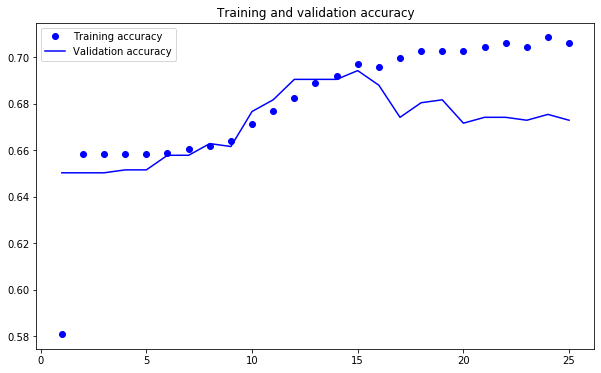

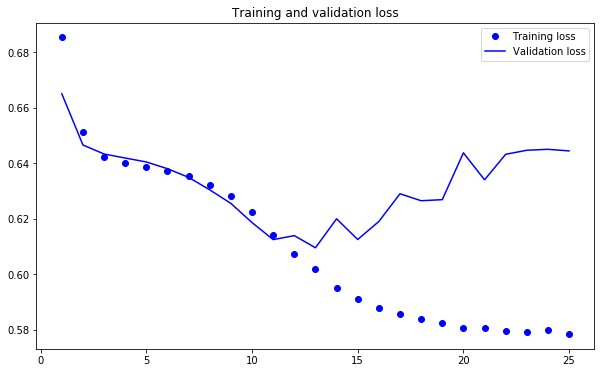

In [37]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Отчётливо видим момент начала переобучения с 12 эпохи.Обучим новую на 12 эпохах и сохраним веса:

In [42]:
fin_model = Sequential()

fin_model.add(Dense(8, activation='relu'))
fin_model.add(Dense(4, activation='relu'))
fin_model.add(Dense(1, activation='sigmoid'))

fin_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['binary_accuracy'])

fin_history = fin_model.fit(normed_train_lds, normed_train_labels, epochs=12, validation_data=(normed_test_lds, normed_test_labels), shuffle=True)
fin_model.save_weights('model.h5')

Train on 3178 samples, validate on 795 samples
Epoch 1/12
3178/3178 [==============================] - 0s 65us/step - loss: 0.7081 - binary_accuracy: 0.4374 - val_loss: 0.6816 - val_binary_accuracy: 0.6591
Epoch 2/12
3178/3178 [==============================] - 0s 30us/step - loss: 0.6590 - binary_accuracy: 0.6589 - val_loss: 0.6440 - val_binary_accuracy: 0.6541
Epoch 3/12
3178/3178 [==============================] - 0s 31us/step - loss: 0.6409 - binary_accuracy: 0.6595 - val_loss: 0.6409 - val_binary_accuracy: 0.6553
Epoch 4/12
3178/3178 [==============================] - 0s 33us/step - loss: 0.6391 - binary_accuracy: 0.6595 - val_loss: 0.6388 - val_binary_accuracy: 0.6579
Epoch 5/12
3178/3178 [==============================] - 0s 30us/step - loss: 0.6379 - binary_accuracy: 0.6598 - val_loss: 0.6369 - val_binary_accuracy: 0.6591
Epoch 6/12
3178/3178 [==============================] - 0s 32us/step - loss: 0.6363 - binary_accuracy: 0.6608 - val_loss: 0.6342 - val_binary_accuracy: 0.6591

Теперь передадим в обученную сеть целый набор с декабря 2010 по октября 2011 включительно чтобы предсказать совершение заказа в ноябре:

In [47]:
full_lds = lds.copy()
full_lds.pop('Target')

CustomerID
12347    1
12348    0
12350    0
12352    0
12353    0
        ..
18280    0
18281    0
18282    0
18283    1
18287    1
Name: Target, Length: 3973, dtype: int32

Совершим те же самые действия по обработке:

In [48]:
full_lds = (full_lds - full_lds.min()) / (full_lds.max() - full_lds.min())
full_lds = full_lds.fillna(0)
full_lds = full_lds.to_numpy()

Предскажем:

In [141]:
pred = fin_model.predict_proba(full_lds)
pred

array([[0.6337461 ],
       [0.46888614],
       [0.47461903],
       ...,
       [0.3003557 ],
       [0.4924896 ],
       [0.34455255]], dtype=float32)

Добавим в набор наши предсказания:

In [186]:
pred = np.reshape(pred, (3973, ))
output = pd.DataFrame({'CustomerID': CustomerID, 'prob': pred})
output

,CustomerID,prob
0,12347,0.633746
1,12348,0.468886
2,12350,0.474619
3,12352,0.490256
4,12353,0.206404
...,...,...
3968,18280,0.301640
3969,18281,0.300074
3970,18282,0.300356
3971,18283,0.492490


Сохраним наш резльтат:

In [187]:
output.to_csv('prediction.csv', sep=';', index=False)
print('Сохранение завершено.')

Сохранение завершено.


На этом мы закончим работу и отметим несколько моментов:  
* наша сеть не учитывает временные показатели. Для более точных предсказаний следует использовать фичи связанные со временем (сезонность покупок, количество дней с момента последней покупки и т.д.)  
* для более точных пресказаний следует провести RFM-анализ и добавить его результат как фичи в набор для обучения  